<a href="https://colab.research.google.com/github/meetdelvadiya/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Meet_Delvadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

**Data Description** 

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Statements**

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,classification_report,roc_curve,accuracy_score


#**Loading and inspecting data**



In [3]:
#Reading a data file  
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")

In [4]:
#It gives Top 5 rows of Dataset 
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#It gives last 5 rows of Dataset
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
# It gives Total number of rows and columns of dataset.
dataset.shape

(2000, 21)

The Dataset has 2000 rows and 21 columns.

In [7]:
#It gives total columns, data types and null count of dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
battery_power,int64,0,1094
blue,int64,0,2
clock_speed,float64,0,26
dual_sim,int64,0,2
fc,int64,0,20
four_g,int64,0,2
int_memory,int64,0,63
m_dep,float64,0,10
mobile_wt,int64,0,121
n_cores,int64,0,8


As shown above , there are no null values in the dataset. There are 4 unique values in 'price_range'(dependent) variable.

In [9]:
#It gives some basic statistical details like percentile, mean, std, max etc.
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#**Exploratory Data Analysis**



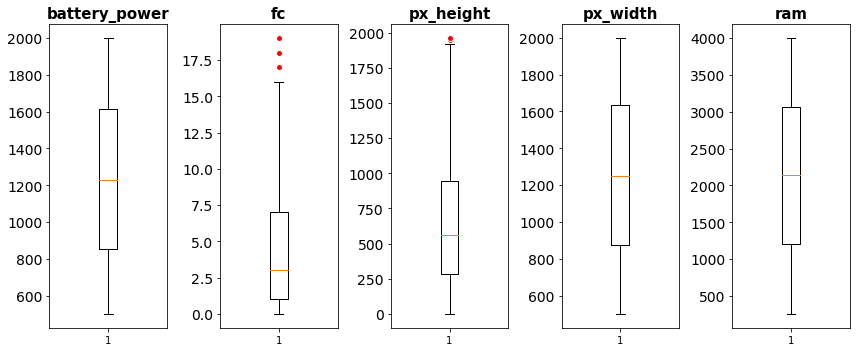

In [10]:
#Creating subplot of each column with its own scale

df = pd.DataFrame(data = dataset, columns=['battery_power','fc','px_height','px_width','ram'])
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(12,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

As shown in figure, There are few outliers present in 'front camera' and 'px_height' in dataset.

In [11]:
#Removing outliers

Q1 = dataset['px_height'].quantile(0.25)
Q3 = dataset['px_height'].quantile(0.75)
IQR = Q3 - Q1
all_cols = dataset.columns
idx = dataset[((dataset['px_height'] < (Q1 - 1.5 * IQR)) | (dataset['px_height'] > (Q3 + 1.5 * IQR)))] [all_cols].index
dataset = dataset.drop(dataset.index[idx])
dataset.shape

(1998, 21)

In [12]:
#Removing outliers

Q1 = dataset['fc'].quantile(0.25)
Q3 = dataset['fc'].quantile(0.75)
IQR = Q3 - Q1
all_cols = dataset.columns
idx = dataset[((dataset['fc'] < (Q1 - 1.5 * IQR)) | (dataset['fc'] > (Q3 + 1.5 * IQR)))] [all_cols].index
dataset = dataset.drop(dataset.index[idx])
dataset.shape

(1980, 21)

After removing outliers, there are 1980 rows and 21 columns in dataset.

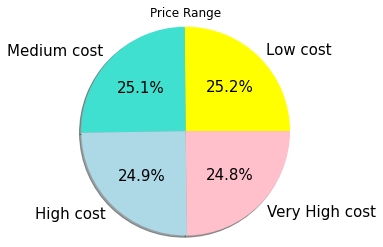

In [13]:
#Creating pie-chart

labels = ["Low cost", "Medium cost", "High cost", "Very High cost"]
values = dataset['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius = 1.2,textprops = {"fontsize":15})
ax1.set_title('Price Range')
plt.show()

As shown above, all phones have equal weightage among price-range.

<Figure size 1080x1080 with 0 Axes>

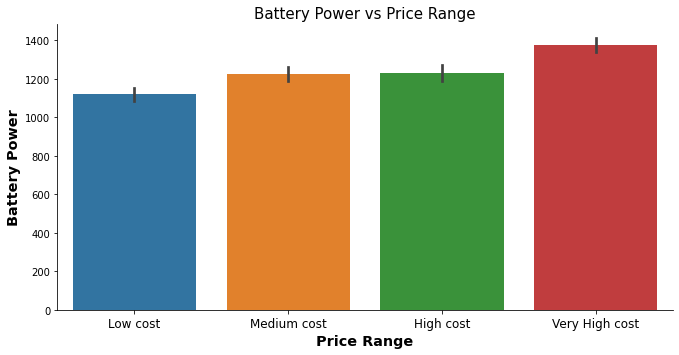

In [14]:
plt.figure(figsize=[15,15])
graph = sns.catplot(x= 'price_range', y = 'battery_power', data = dataset, kind = "bar", height=5,aspect=1.9)
plt.title('Battery Power vs Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Battery Power',fontsize='x-large',fontweight='bold')
plt.show()

As shown above, Price range increases with increment in Battery power capacity.

<Figure size 1440x1080 with 0 Axes>

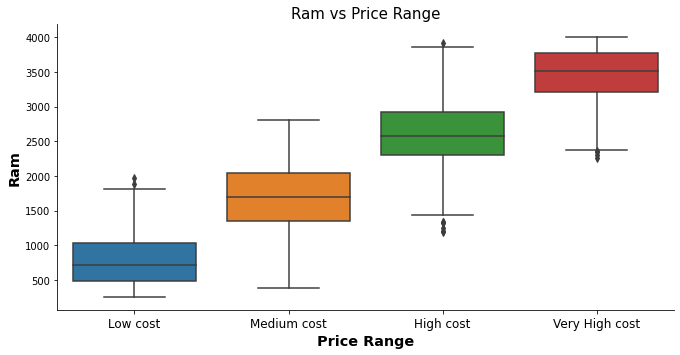

In [15]:
plt.figure(figsize=[20,15])
graph = sns.catplot(x= 'price_range', y = 'ram', data = dataset, kind = "box", height=5,aspect=1.9)
plt.title('Ram vs Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Ram',fontsize='x-large',fontweight='bold')
plt.show()

As shown above, Price range increases with increment in RAM capacity.

<Figure size 1008x432 with 0 Axes>

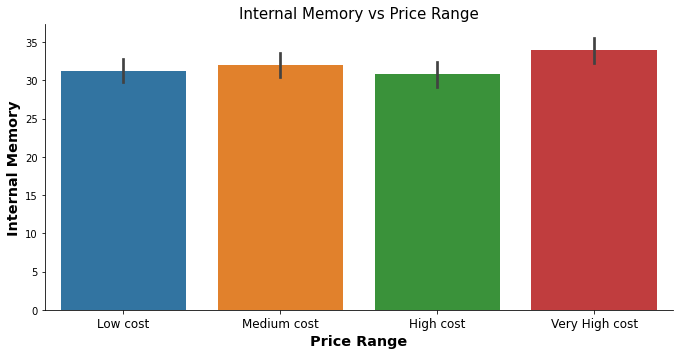

In [16]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x="price_range", y="int_memory",kind='bar', data=dataset, height=5,aspect=1.9)
plt.title('Internal Memory vs Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Internal Memory',fontsize='x-large',fontweight='bold')
plt.show()

 There is not much of correlation between Internal Memory and Price Range.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


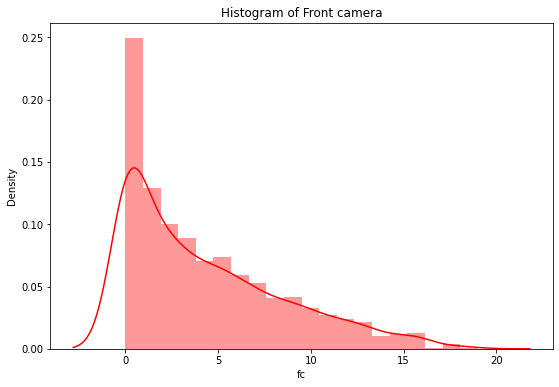

In [17]:
plt.figure(figsize=(9,6))
plt.title("Histogram of Front camera")
sns.distplot(dataset['fc'],color="r")

We can see that a lot of mobile phones are built with front cameras which have less MegaPixels.

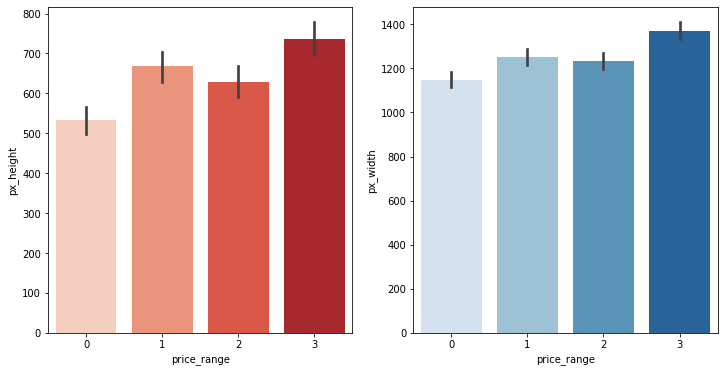

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x = "price_range", y = "px_height" , data= dataset, palette = "Reds")
plt.subplot(1,2,2)
sns.barplot(x = "price_range" , y = "px_width" , data= dataset, palette = "Blues")
plt.show()

As we can see, Generally price increases with increment in size of screen.

<Figure size 1008x432 with 0 Axes>

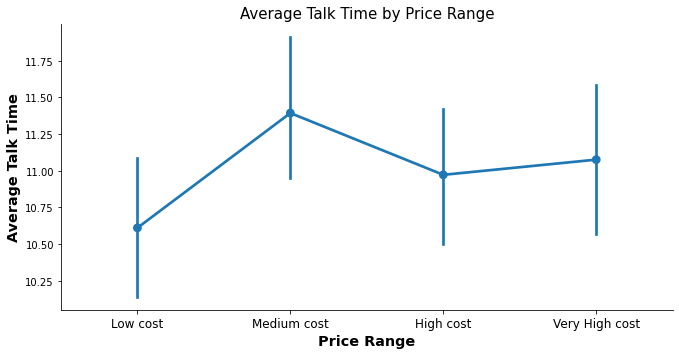

In [19]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x="price_range", y="talk_time", kind="point", data=dataset, height=5,aspect=1.9)
plt.title('Average Talk Time by Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Average Talk Time',fontsize='x-large',fontweight='bold')
plt.show()

The Average Talktime of the medium cost mobile phones is higher than rest of the other priced mobile phones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


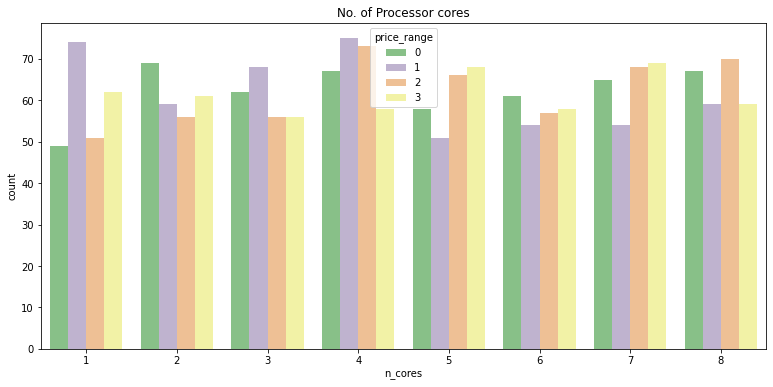

In [20]:
# n_cores bar graph

plt.figure(figsize=(13,6))
plt.title("No. of Processor cores")
sns.countplot(dataset["n_cores"] , hue = dataset["price_range"] , palette = "Accent")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


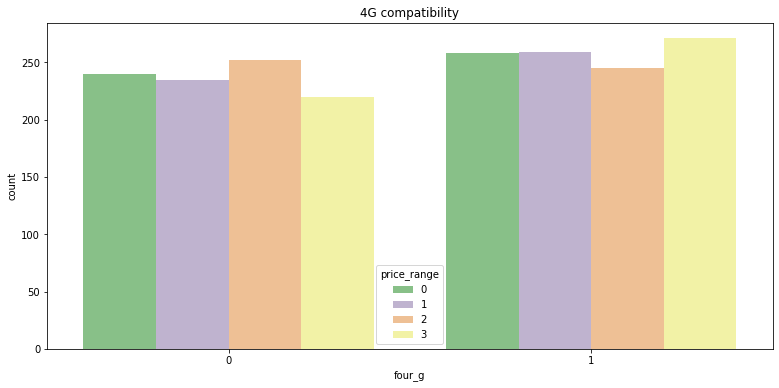

In [21]:
#4g bar graph
plt.figure(figsize=(13,6))
plt.title("4G compatibility")
sns.countplot(dataset["four_g"] , hue = dataset["price_range"] , palette = "Accent")
plt.show()

We can see, more than half of mobile phones are 4G.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


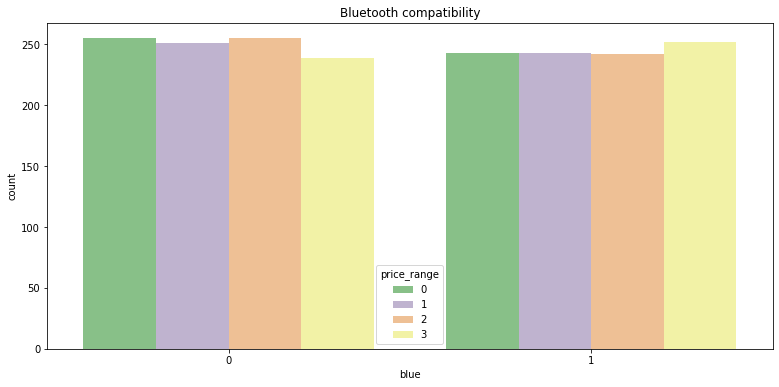

In [22]:
#bluetooth bargraph
plt.figure(figsize=(13,6))
plt.title("Bluetooth compatibility")
sns.countplot(dataset["blue"] , hue = dataset["price_range"] , palette = "Accent")
plt.show()

There is no impact of 'bluetooth' function with price. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


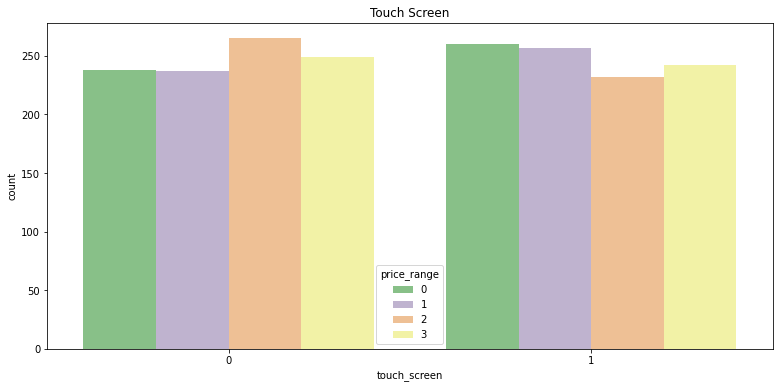

In [23]:
#Touchscreen bargraph
plt.figure(figsize=(13,6))
plt.title("Touch Screen")
sns.countplot(dataset["touch_screen"] , hue = dataset["price_range"] , palette = "Accent")
plt.show()

There is no impact of 'Touch Screen' function with price. 

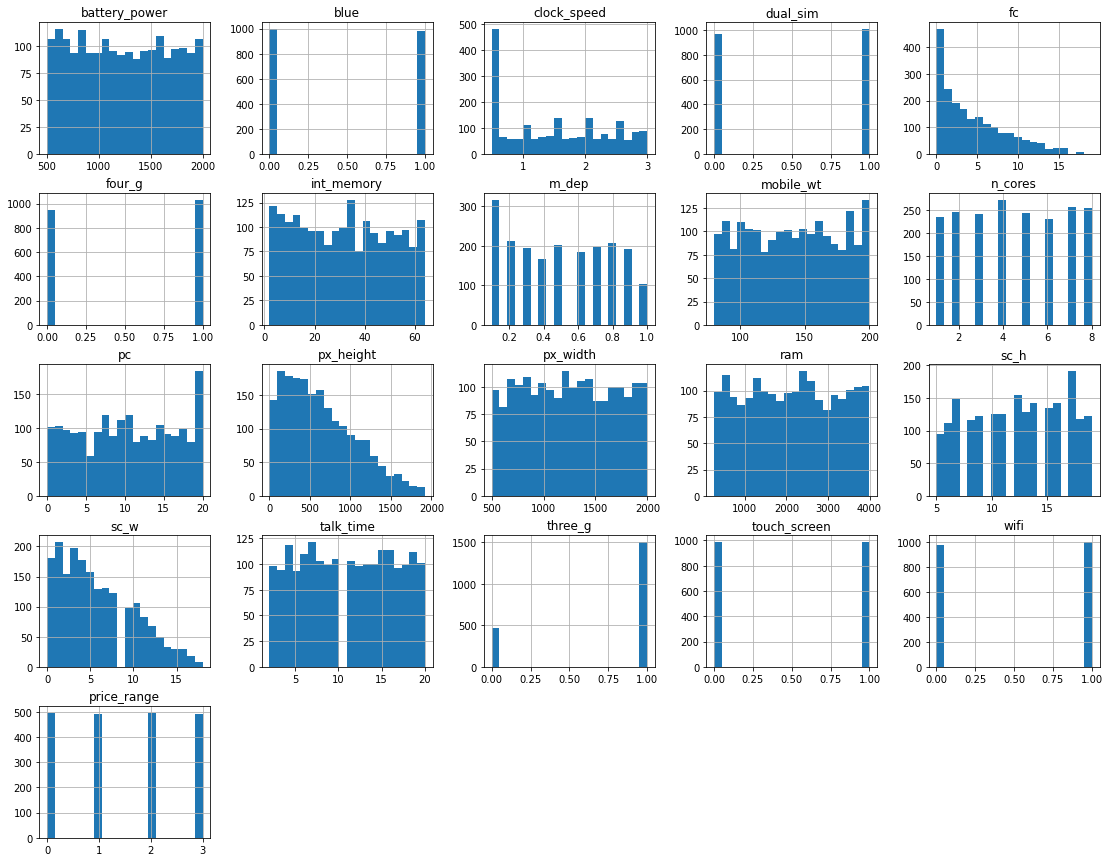

In [24]:
#Histogram
dataset.hist(figsize=(19,15),bins=20)
plt.show()

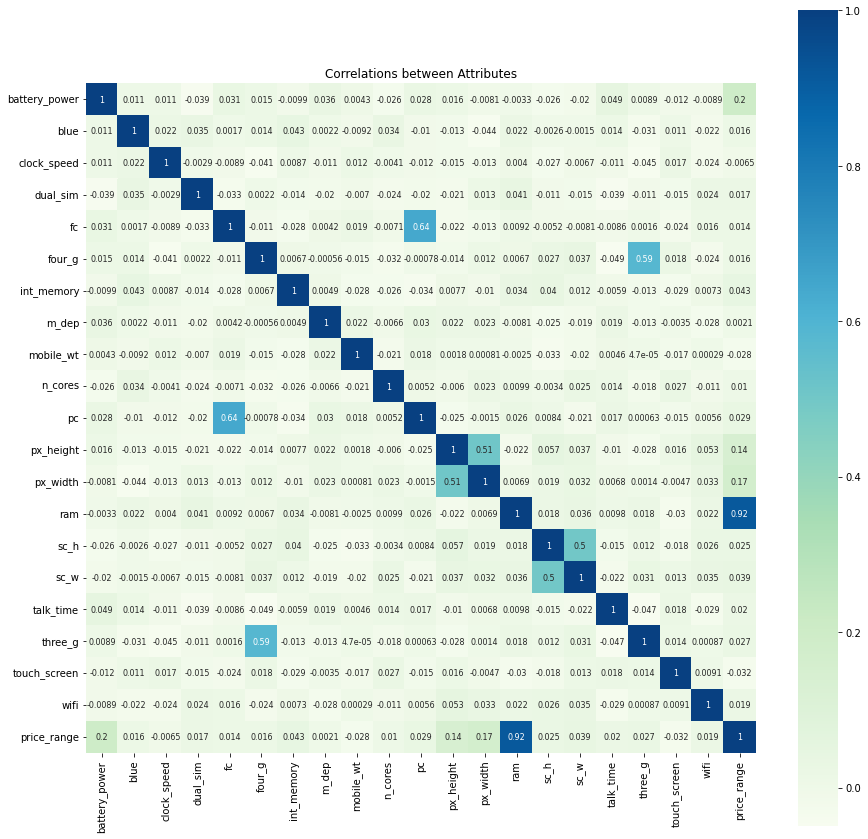

In [25]:
#corelation
fig = plt.subplots (figsize = (15, 15))
sns.heatmap(dataset.corr (), square = True, cbar = True, annot = True, cmap='GnBu', annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show()


We can see from this correlation matrix that:

1) "RAM" & "Price range"(target variable) is highly correlated.

2) Three_g & Four_g is moderately correlated.

3) pc(primary camera) & fc(front camera) is moderately correlated.

4) px_height & px_width is moderately correlated.

5) sc_h & sc_w (screen height & screen width) is moderately correlated.

6) Other variables have low correlation.

#**Feature Engineering**

In [26]:
#creating screen size and total pixels column

dataset["screen_size"] = ((dataset['sc_h']**2)+(dataset['sc_w']**2))**0.5
dataset["pixels"] = dataset["px_height"] * dataset["px_width"]

In [27]:
#Dropping original columns

dataset.drop(columns=["sc_h" , "sc_w" , "px_height" , "px_width"] , inplace= True)

#**Modelling**

In [28]:
X = dataset.drop("price_range" , axis = 1)
y = dataset["price_range"]

In [29]:
X.shape

(1980, 18)

In [30]:
y.shape

(1980,)

In [31]:
#Train-test split

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [32]:
X_train.shape

(1386, 18)

In [33]:
X_test.shape

(594, 18)

In [34]:
# Standardization using Standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#1) Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(fit_intercept=True, max_iter=10000)
classifierLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Predicting the Test set results
y_predLR = classifierLR.predict(X_test)
y_predLR

array([3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1,
       3, 0, 0, 2, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 1, 1, 2, 3, 0, 2, 2, 2,
       2, 0, 0, 2, 3, 0, 1, 3, 0, 1, 1, 3, 0, 3, 1, 2, 1, 3, 0, 2, 3, 0,
       1, 2, 0, 1, 0, 1, 3, 3, 3, 0, 0, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3,
       1, 1, 2, 0, 3, 0, 3, 3, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 3, 0, 3, 2, 2, 0, 1, 3, 1, 3, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       3, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 1, 3, 3, 3, 2, 0, 2, 3,
       1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 1,
       0, 3, 0, 2, 2, 2, 1, 0, 3, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 0, 3, 3, 1, 1, 1, 2, 2, 3, 1, 3, 0, 3, 2, 1, 0, 0, 3, 0, 1, 2,
       1, 0, 0, 1, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 3, 0,
       3, 1, 3, 0, 0, 0, 3, 2, 0, 0, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 1, 2,
       0, 3, 2, 0, 3, 2, 2, 2, 3, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 0, 0, 1,
       1, 0, 2, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2, 0, 0,

In [37]:
# Confusion Matrix
cmLR = confusion_matrix(y_test, y_predLR)
cmLR

array([[157,   2,   0,   0],
       [ 12, 134,   9,   0],
       [  0,   8, 117,   5],
       [  0,   0,  10, 140]])

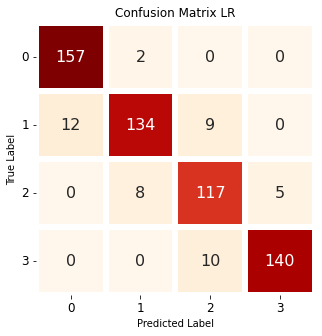

In [38]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_predLR)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(5,5))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix LR", size = 12)
plt.show()

In [39]:
#Train Accuracy
classifierLR.score(X_train,y_train)

0.9437229437229437

In [40]:
#Test Accuracy
LR_score=accuracy_score(y_test, y_predLR)
LR_score

0.9225589225589226

In [41]:
y_pred_proba = classifierLR.predict_proba(X_test)

In [42]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9939375496550716

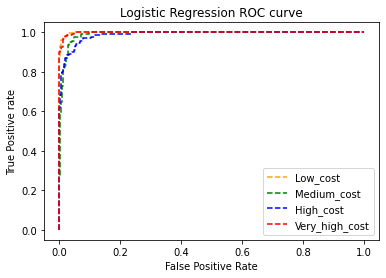

In [43]:
# roc curve
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

#2) K Nearest neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
y_predKNN = classifierKNN.predict(X_test)
y_predKNN

array([2, 1, 0, 3, 1, 1, 2, 2, 1, 3, 2, 1, 1, 3, 0, 2, 2, 1, 1, 2, 0, 1,
       3, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 1, 0, 1, 3, 0, 3, 2, 2,
       3, 0, 0, 1, 3, 0, 0, 3, 0, 1, 0, 2, 2, 3, 1, 3, 1, 2, 1, 2, 3, 0,
       0, 2, 0, 1, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 3,
       1, 0, 2, 0, 3, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 3, 2, 1, 0,
       1, 0, 3, 3, 0, 3, 0, 2, 1, 2, 3, 2, 3, 0, 0, 2, 2, 2, 0, 2, 1, 0,
       3, 1, 1, 1, 2, 1, 0, 3, 0, 2, 1, 2, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3,
       0, 1, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       1, 3, 0, 3, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 0, 3, 1, 3, 1, 0, 1, 1, 2, 1, 3, 0, 3, 2, 2, 0, 0, 3, 1, 0, 3,
       1, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 3, 1, 0, 0, 3, 1, 0, 0, 2, 1, 0,
       3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 3, 1, 1, 3, 0, 3, 1, 3, 1, 3, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0,

In [46]:
# Making the Confusion Matrix
cmKNN = confusion_matrix(y_test, y_predKNN)
cmKNN

array([[127,  28,   4,   0],
       [ 58,  60,  33,   4],
       [  8,  53,  52,  17],
       [  1,  16,  58,  75]])

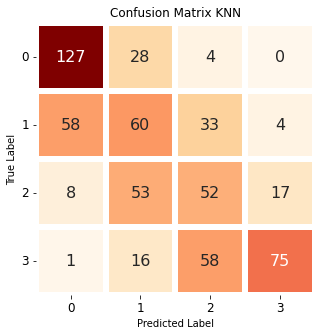

In [47]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_predKNN)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(5,5))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix KNN", size = 12)
plt.show()

In [48]:
#Train Accuracy
classifierKNN.score(X_train,y_train)

0.7085137085137085

In [49]:
#Test Accuracy
KNN_score=accuracy_score(y_test, y_predKNN)
KNN_score

0.5286195286195287

In [50]:
y_pred_proba = classifierKNN.predict_proba(X_test)

In [51]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.7515043097436416

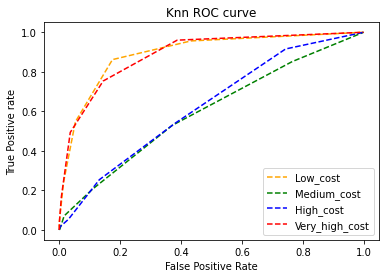

In [52]:
# roc curve
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

#3) Support Vector Machine


In [53]:
from sklearn.svm import SVC
classifierSVC = SVC(kernel = 'linear' , random_state = 0,probability=True)
classifierSVC.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_predSVC = classifierSVC.predict(X_test)
y_predSVC

array([3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1,
       3, 0, 0, 2, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 1, 1, 2, 3, 0, 2, 2, 2,
       2, 0, 0, 2, 3, 0, 1, 3, 0, 1, 1, 3, 0, 3, 1, 2, 1, 3, 0, 2, 3, 0,
       1, 2, 0, 1, 0, 1, 3, 3, 3, 0, 0, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3,
       1, 1, 2, 0, 3, 0, 3, 3, 1, 2, 0, 3, 2, 2, 0, 1, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 3, 0, 3, 2, 2, 0, 1, 3, 1, 3, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       3, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 1, 3, 3, 3, 2, 0, 2, 3,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 1,
       0, 3, 0, 2, 2, 2, 1, 0, 3, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 0, 3, 3, 1, 1, 1, 2, 2, 3, 1, 3, 0, 3, 2, 1, 0, 0, 3, 0, 1, 2,
       1, 0, 0, 1, 0, 3, 1, 3, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 3, 0,
       3, 1, 3, 0, 0, 0, 3, 2, 0, 0, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 1, 2,
       0, 3, 2, 0, 3, 2, 2, 2, 3, 0, 3, 1, 3, 1, 3, 3, 1, 2, 1, 0, 0, 1,
       1, 0, 2, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2, 0, 0,

In [55]:
cmSVC = confusion_matrix(y_test , y_predSVC)
cmSVC

array([[155,   4,   0,   0],
       [  8, 138,   9,   0],
       [  0,   8, 118,   4],
       [  0,   0,  10, 140]])

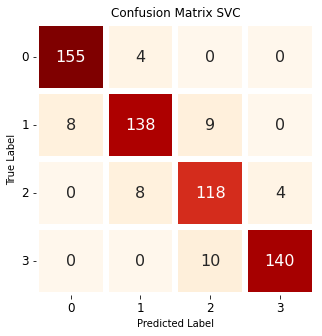

In [56]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_predSVC)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(5,5))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix SVC", size = 12)
plt.show()

In [57]:
#Train Accuracy
classifierSVC.score(X_train,y_train)

0.9444444444444444

In [58]:
#Test Accuracy
SVC_score=accuracy_score(y_test, y_predSVC)
SVC_score

0.9276094276094277

In [59]:
y_pred_proba = classifierSVC.predict_proba(X_test)

In [60]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9936199297222492

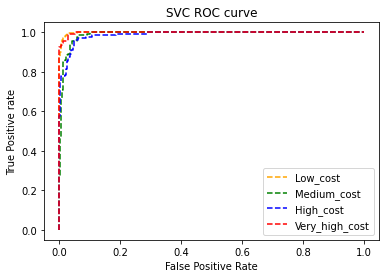

In [61]:
# roc curve
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('SVC ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

#4) Decision Tree Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier( criterion = "entropy",random_state=0)
classifierDT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
y_predDT = classifierDT.predict(X_test)
y_predDT

array([3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1,
       3, 0, 0, 2, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 1, 1, 2, 3, 0, 2, 2, 2,
       2, 0, 0, 2, 3, 0, 1, 3, 0, 1, 1, 2, 0, 3, 1, 2, 1, 3, 0, 2, 3, 0,
       1, 2, 0, 1, 0, 1, 3, 3, 3, 0, 0, 1, 0, 0, 2, 3, 3, 2, 0, 3, 1, 3,
       1, 1, 2, 0, 3, 0, 2, 3, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 3, 0, 3, 2, 2, 0, 1, 3, 1, 3, 3, 0, 1, 2, 0, 0, 2, 0, 0,
       3, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 3, 1, 3, 3, 3, 2, 0, 2, 3,
       1, 0, 1, 3, 3, 3, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 3, 0, 2, 1, 1,
       0, 3, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 0, 3, 2, 1, 0, 0, 3, 0, 1, 3,
       2, 0, 0, 1, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 3, 1, 1, 0, 2, 3, 0,
       3, 1, 3, 0, 0, 0, 3, 2, 0, 0, 1, 2, 3, 0, 2, 1, 3, 0, 1, 1, 1, 2,
       0, 3, 1, 0, 3, 2, 2, 2, 2, 0, 3, 0, 3, 1, 3, 3, 1, 2, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 1, 2, 0, 0,

In [64]:
cmDT = confusion_matrix(y_test , y_predDT)
cmDT

array([[151,   8,   0,   0],
       [ 20, 124,  11,   0],
       [  0,  17, 104,   9],
       [  0,   0,  18, 132]])

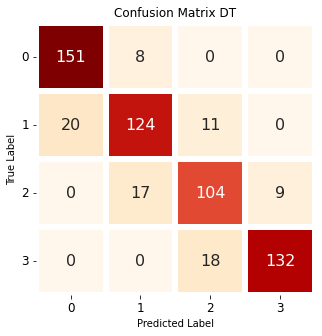

In [65]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_predDT)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(5,5))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix DT", size = 12)
plt.show()

In [66]:
#Train Accuracy
classifierDT.score(X_train,y_train)

1.0

In [67]:
#Test Accuracy
DT_score=accuracy_score(y_test, y_predDT)
DT_score

0.8602693602693603

In [68]:
y_pred_proba = classifierDT.predict_proba(X_test)

In [69]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9057854494628351

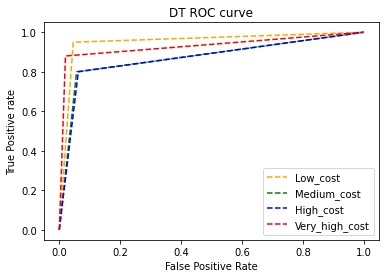

In [70]:
# roc curve
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('DT ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

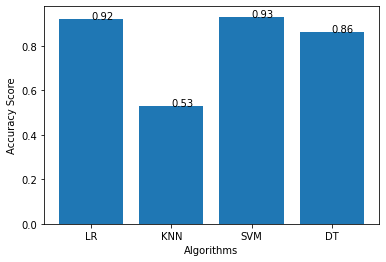

In [71]:
#Plotting all model accuracy using bar chart

import matplotlib.pyplot as plt
x=['LR','KNN','SVM','DT']
height=[LR_score,KNN_score,SVC_score,DT_score]
acc =  [round(x,2) for x in height] 

plt.bar(x,acc)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

for value, index in enumerate(acc):
    plt.text(value, index, str(acc[value]))
plt.show()

As we can see, Logistic Regression and Support Vector Machine gives higest accuracy(92%).
So we will perform Hyperparameter optimization using GridSearchCV

#Hyperparameter optimization

Logistic regression does not really have any critical hyperparameters to tune. So there will be no significance difference on accuracy after hyperparameters tuning.

In [72]:
#Grid search for LR

from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# fitting the model for grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [73]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [74]:
grid_search.best_score_

0.9242344752356958

In [75]:
grid_search.best_estimator_.score(X_test,y_test)

0.930976430976431

In [76]:
grid_predictions_LR = grid_search.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_LR))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       159
           1       0.94      0.88      0.91       155
           2       0.88      0.92      0.90       130
           3       0.97      0.93      0.95       150

    accuracy                           0.93       594
   macro avg       0.93      0.93      0.93       594
weighted avg       0.93      0.93      0.93       594



In [77]:
#Grid search for SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf','poly','sigmoid','linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search

grid_result_SVC=grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.266, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.264, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.264, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.264, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.267, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.723, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.715, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.736, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.726, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.736, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.6min finished


In [78]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [79]:
grid.best_score_

0.9235202451757006

In [80]:
grid.best_estimator_.score(X_test,y_test)

0.9292929292929293

In [81]:
grid_predictions_SVC = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_SVC))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       159
           1       0.93      0.88      0.90       155
           2       0.87      0.90      0.89       130
           3       0.97      0.94      0.96       150

    accuracy                           0.93       594
   macro avg       0.93      0.93      0.93       594
weighted avg       0.93      0.93      0.93       594



As we can observe, after hyperparameter tuning, there is not considerable difference in model accuracy as both Linear regression and Support Vector Machine gives same accuracy(93%).However, Logistic regression has slight upper hand in terms of accuracy compared to SVM.

#Conclusion



*   The dataset does not contain any null values.
*   RAM is highly correlated with dependent variables. While 3G-4G and Primary camera-Front camera have better correlation in independent variables.
*   Created new features like Screen Size and Total Pixels from height and width of given features for dimensionality reduction.
*   By fitting all the models we are getting best score in Logistic regression Model. After hyperparameters tuning using Grid Search CV, there is not getting much difference between Logistic regression and Support Vector Machine.
*   KNN has the lowest accuracy among all algorithms.



